
# Introduction to Ensemble Methods

Ensemble methods are a powerful class of machine learning techniques that combine multiple models to improve predictive performance. The main idea is to leverage the strengths of different models while mitigating their weaknesses, leading to more robust and accurate predictions.

Ensemble methods can be broadly categorized into two types:

-   **Bagging (Bootstrap Aggregating)**: Combines predictions from multiple models trained on different subsets of the training data. The most common example is Random Forests, which builds multiple decision trees and averages their predictions.
-   **Boosting**: Sequentially builds models, where each new model focuses on correcting the errors made by the previous models. Examples include AdaBoost, Gradient Boosting, and XGBoost.

## Why Use Ensemble Methods?

-   **Improved Accuracy**: By combining multiple models, ensemble methods can achieve higher accuracy than individual models, especially in complex datasets.
-   **Robustness**: Ensembles are less sensitive to noise and outliers, as they average out the errors of individual models.
-   **Reduced Overfitting**: Bagging methods like Random Forests reduce overfitting by averaging predictions from multiple trees, while boosting methods focus on correcting errors rather than fitting noise.
-   **Flexibility**: Ensemble methods can be applied to a wide range of base models, including decision trees, linear models, and neural networks, making them versatile for various tasks.
-   **Interpretability**: Some ensemble methods, like Random Forests, provide insights into feature importance, helping to understand which features contribute most to the predictions.
-   **Scalability**: Many ensemble methods can be parallelized, making them suitable for large datasets and high-dimensional feature spaces.
-   **Handling Imbalanced Data**: Ensemble methods can be effective in dealing with imbalanced datasets by focusing on the minority class during training, especially in boosting methods.
-   **Combining Different Algorithms**: Ensembles can combine predictions from different types of models, allowing for a more comprehensive understanding of the data and improving overall performance.
-   **Hyperparameter Tuning**: Ensembles can help in hyperparameter tuning by providing a more stable performance across different configurations, as the ensemble averages out the variability of individual models.
-   **Feature Selection**: Some ensemble methods, like Random Forests, can automatically perform feature selection by evaluating feature importance, helping to reduce dimensionality and improve model interpretability.
-   **Real-World Applications**: Ensemble methods are widely used in various domains, including finance (credit scoring), healthcare (disease prediction), and image recognition, due to their effectiveness in handling complex and noisy data.

## Practical Demonstration

To illustrate the concepts of ensemble methods, we will use the Iris dataset and apply both Random Forests and Gradient Boosting classifiers. We will compare their performance using accuracy and confusion matrices.

-   Loading the `iris` dataset

In [1]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
class_names = iris.target_names

-   Train-test split

In [2]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

-   Train a Random Forest Classifier and evaluate its performance

Random Forest Classifier Accuracy: 0.8888888888888888
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.78      0.93      0.85        15
   virginica       0.92      0.73      0.81        15

    accuracy                           0.89        45
   macro avg       0.90      0.89      0.89        45
weighted avg       0.90      0.89      0.89        45



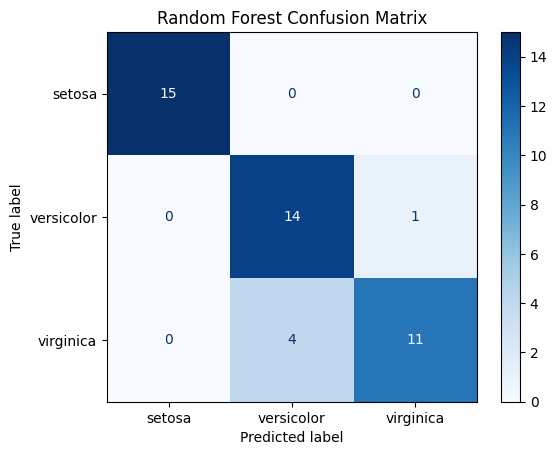

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

print("Random Forest Classifier Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf, target_names=class_names))

ConfusionMatrixDisplay.from_estimator(rf_model, X_test, y_test,
                                      display_labels=class_names, cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.show()

-   Train a Gradient Boosting Classifier and evaluate its performance

Gradient Boosting Classifier Accuracy: 0.9333333333333333
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.88      0.93      0.90        15
   virginica       0.93      0.87      0.90        15

    accuracy                           0.93        45
   macro avg       0.93      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45



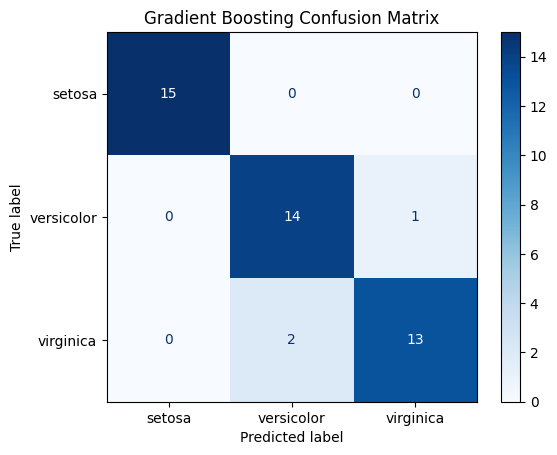

In [4]:
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)

y_pred_gb = gb_model.predict(X_test)

print("Gradient Boosting Classifier Accuracy:", accuracy_score(y_test, y_pred_gb))
print(classification_report(y_test, y_pred_gb, target_names=class_names))

ConfusionMatrixDisplay.from_estimator(gb_model, X_test, y_test,
                                      display_labels=class_names, cmap='Blues')
plt.title('Gradient Boosting Confusion Matrix')
plt.show()

-   Feature importance for Random Forest

Feature importances for Random Forest:
petal width (cm): 0.4549
petal length (cm): 0.4002
sepal length (cm): 0.1206
sepal width (cm): 0.0243


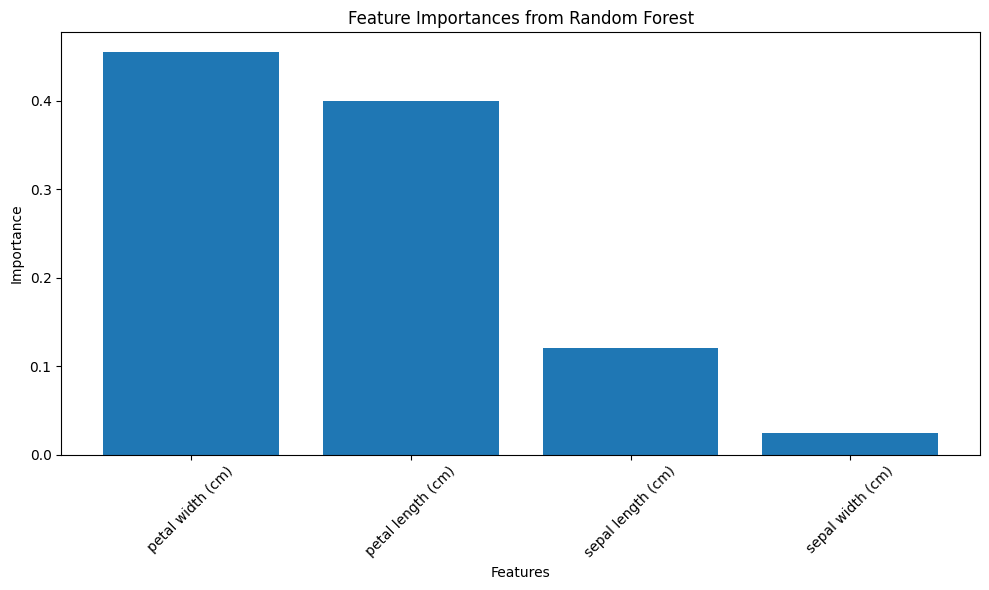

In [22]:
importances = rf_model.feature_importances_
indices = importances.argsort()[::-1]
print("Feature importances for Random Forest:")
for i in range(X.shape[1]):
    print(f"{feature_names[indices[i]]}: {importances[indices[i]]:.4f}")

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), [feature_names[i] for i in indices], rotation=45)
plt.title('Feature Importances from Random Forest')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()

-   Feature importance for Gradient Boosting

Feature importances for Gradient Boosting:
petal width (cm): 0.6642
petal length (cm): 0.3106
sepal length (cm): 0.0139
sepal width (cm): 0.0113


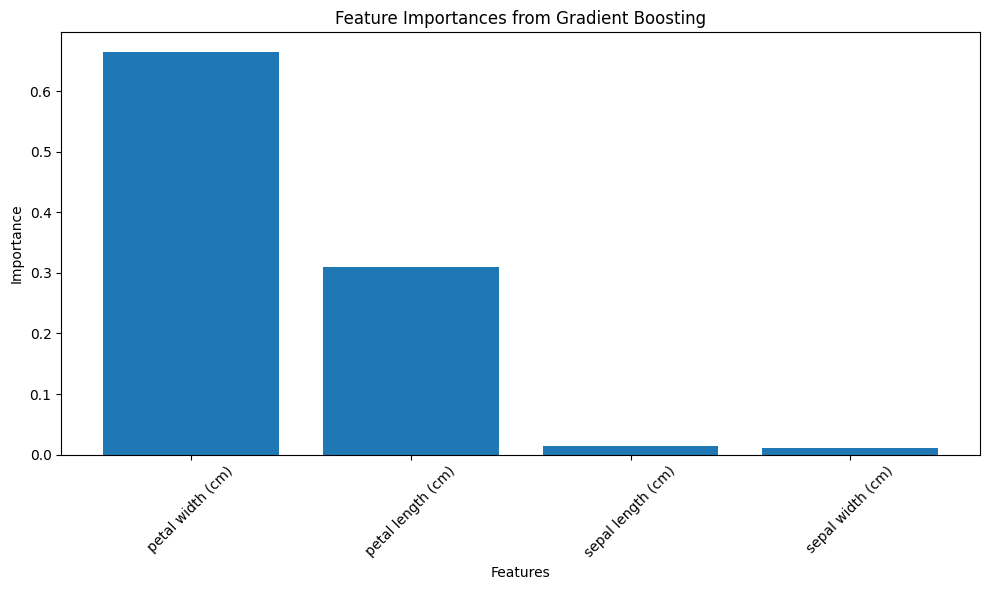

In [23]:
gb_importances = gb_model.feature_importances_
gb_indices = gb_importances.argsort()[::-1]
print("Feature importances for Gradient Boosting:")
for i in range(X.shape[1]):
    print(f"{feature_names[gb_indices[i]]}: {gb_importances[gb_indices[i]]:.4f}")

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), gb_importances[gb_indices], align='center')
plt.xticks(range(X.shape[1]), [feature_names[i] for i in gb_indices], rotation=45)
plt.title('Feature Importances from Gradient Boosting')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()

## Hands-on Exercises

**Voting Classifier**: Implement a Voting Classifier that combines the predictions of the Random Forest and Gradient Boosting classifiers. Evaluate its performance on the test set.

-   Import, instantiate, and train a `VotingClassifier` model from `sklearn.ensemble`.

In [31]:
from sklearn.ensemble import VotingClassifier

voting_model = VotingClassifier(
    estimators=[
        ('rf', RandomForestClassifier(n_estimators=10)),
        ('gb', GradientBoostingClassifier(n_estimators=10))
    ],
    voting='soft')
voting_model.fit(X_train, y_train)

,estimators,"[('rf', ...), ('gb', ...)]"
,voting,'soft'
,weights,None
,n_jobs,None
,flatten_transform,True
,verbose,False
,n_estimators,10
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1


-   Evaluate the performance of the Voting Classifier

Voting Classifier Accuracy: 0.9555555555555556
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.93      0.93      0.93        15
   virginica       0.93      0.93      0.93        15

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



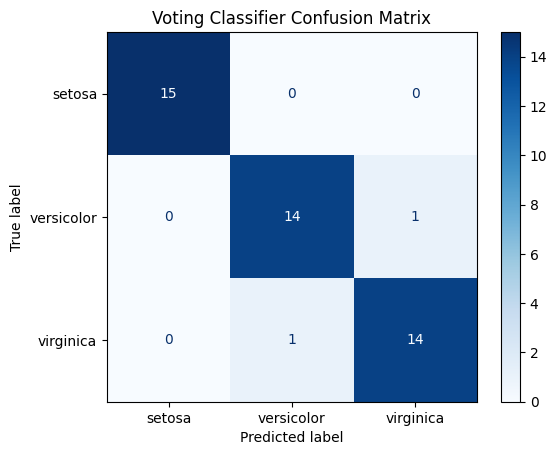

In [32]:
y_pred_voting = voting_model.predict(X_test)

print("Voting Classifier Accuracy:", accuracy_score(y_test, y_pred_voting))
print(classification_report(y_test, y_pred_voting, target_names=class_names))

ConfusionMatrixDisplay.from_estimator(voting_model, X_test, y_test,
                                      display_labels=class_names, cmap='Blues')
plt.title('Voting Classifier Confusion Matrix')
plt.show()